In [1]:
%matplotlib inline
from eden_wrapper import EdenWrapper

In [2]:
train = [
    ('ce1cg', 
     'TAATGTTTGTGCTGGTTTTTGTGGCATCGGGCGAGAATAGCGCGTGGTGTGAAAGACTGTTTTTTTGATCGTTTTCACAAAAATGGAAGTCCACAGTCTTGACAG'),
    ('ara', 
     'GACAAAAACGCGTAACAAAAGTGTCTATAATCACGGCAGAAAAGTCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCATAGCATTTTTATCCATAAG'),
    ('bglr1', 
     'ACAAATCCCAATAACTTAATTATTGGGATTTGTTATATATAACTTTATAAATTCCTAAAATTACACAAAGTTAATAACTGTGAGCATGGTCATATTTTTATCAAT'),
    ('crp', 
     'CACAAAGCGAAAGCTATGCTAAAACAGTCAGGATGCTACAGTAATACATTGATGTACTGCATGTATGCAAAGGACGTCACATTACCGTGCAGTACAGTTGATAGC'),
    ('cya', 
     'ACGGTGCTACACTTGTATGTAGCGCATCTTTCTTTACGGTCAATCAGCAAGGTGTTAAATTGATCACGTTTTAGACCATTTTTTCGTCGTGAAACTAAAAAAACC'),
    ('deop2', 
     'AGTGAATTATTTGAACCAGATCGCATTACAGTGATGCAAACTTGTAAGTAGATTTCCTTAATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA'),
    ('gale', 
     'GCGCATAAAAAACGGCTAAATTCTTGTGTAAACGATTCCACTAATTTATTCCATGTCACACTTTTCGCATCTTTGTTATGCTATGGTTATTTCATACCATAAGCC'),
    ('ilv', 
     'GCTCCGGCGGGGTTTTTTGTTATCTGCAATTCAGTACAAAACGTGATCAACCCCTCAATTTTCCCTTTGCTGAAAAATTTTCCATTGTCTCCCCTGTAAAGCTGT'),
    ('lac', 
     'AACGCAATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGAATTGTGAGCGGATAACAATTTCAC'),
    ('male', 
     'ACATTACCGCCAATTCTGTAACAGAGATCACACAAAGCGACGGTGGGGCGTAGGGGCAAGGAGGATGGAAAGAGGTTGCCGTATAAAGAAACTAGAGTCCGTTTA'),
    ('malk', 
     'GGAGGAGGCGGGAGGATGAGAACACGGCTTCTGTGAACTAAACCGAGGTCATGTAAGGAATTTCGTGATGTTGCTTGCAAAAATCGTGGCGATTTTATGTGCGCA'),
    ('malt', 
     'GATCAGCGTCGTTTTAGGTGAGTTGTTAATAAAGATTTGGAATTGTGACACAGTGCAAATTCAGACACATAAAAAAACGTCATCGCTTGCATTAGAAAGGTTTCT'),
    ('ompa', 
     'GCTGACAAAAAAGATTAAACATACCTTATACAAGACTTTTTTTTCATATGCCTGACGGAGTTCACACTTGTAAGTTTTCAACTACGTTGTAGACTTTACATCGCC'),
    ('tnaa', 
     'TTTTTTAAACATTAAAATTCTTACGTAATTTATAATCTTTAAAAAAAGCATTTAATATTGCTCCCCGAACGATTGTGATTCGATTCACATTTAAACAATTTCAGA'),
    ('uxu1', 
     'CCCATGAGAGTGAAATTGTTGTGATGTGGTTAACCCAATTAGAATTCGGGATTGACATGTCTTACCAAAAGGTAGAACTTATACGCCATCTCATCCGATGCAAGC'),
    ('pbr322', 
     'CTGGCTTAACTATGCGGCATCAGAGCAGATTGTACTGAGAGTGCACCATATGCGGTGTGAAATACCGCACAGATGCGTAAGGAGAAAATACCGCATCAGGCGCTC'),
    ('trn9cat', 
     'CTGTGACGGAAGATCACTTCGCAGAATAAATAAATCCTGGTGTCCCTGTTGATACCGGGAAGCCCTGGGCCAACTTTTGGCGAAAATGAGACGTTGATCGGCACG'),
    ('tdc', 
     'GATTTTTATACTTTAACTTGTTGATATTTAAAGGTATTTAATTGTAATAACGATACTCTGGAAAGTATTGAAAGTTAATTTGTGAGTGGTCGCACATATCCTGTT'),
    ]

# test data consists of first 9 sequences of training data
test = train[:9]

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

ew = EdenWrapper(alphabet='dna',
                # distance=10, 
                # radius=5, 
                clustering_algorithm=km,
                threshold=0,
                wl_resolution = 200)
ew.fit(seqs=train)

In [4]:
for i in ew.original_motives_list:
    for j in i:
        print j
    print

(2, 'TCACACTTT')
(1, 'TTTACACTTT')
(1, 'TCACACTTTT')
(1, 'TCACACAAAG')
(1, 'ATTTCATAC')
(1, 'TCACATTACC')

(1, 'AAAAATTTT')
(1, 'GCATTACAG')
(1, 'AAAATTACAC')
(1, 'GCATAAAAAA')

(1, 'GTTTTTTGTT')
(1, 'TTGTTGTGA')



In [5]:
print ew.score_mm(motif_num=1, seq='CACACAAAGC' * 4, zero_padding=True)

[2.2191162685182994e-305, 4.7657862358462302e-306, 5.1550942899623959e-306, 4.1174189558911987e-307, 3.2253467559475329e-306, 7.1597123443042812e-306, 3.1203217681539977e-305, 3.9346173727495115e-304, 4.9861246165086568e-305, 2.3387697493792541e-06, 2.2191162685182994e-305, 4.7657862358462302e-306, 5.1550942899623959e-306, 4.1174189558911987e-307, 3.2253467559475329e-306, 7.1597123443042812e-306, 3.1203217681539977e-305, 3.9346173727495115e-304, 4.9861246165086568e-305, 2.3387697493792541e-06, 2.2191162685182994e-305, 4.7657862358462302e-306, 5.1550942899623959e-306, 4.1174189558911987e-307, 3.2253467559475329e-306, 7.1597123443042812e-306, 3.1203217681539977e-305, 3.9346173727495115e-304, 4.9861246165086568e-305, 2.3387697493792541e-06, 2.2191162685182994e-305, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
for i in ew.aligned_motives_list:
    for j in i:
        print j
    print 

(2, '---TCACACTTT-')
(1, '--TTTACACTTT-')
(1, '---TCACACTTTT')
(1, '---TCACACAAAG')
(1, 'ATTTCATAC----')
(1, '---TCACATTACC')

(1, '-----AAAAATTTT--')
(1, 'GCATTACAG-------')
(1, '------AAAATTACAC')
(1, 'GCATAAAAAA------')

(1, 'GTTTTTTGTT-')
(1, '--TTGTTGTGA')



In [7]:
for i in ew.motives_list:
    for j in i:
        print j
    print

(2, 'TCACACTTT')
(1, 'TTACACTTT')
(1, 'TCACACTTT')
(1, 'TCACACAAA')
(1, 'TCATACTT-')
(1, 'TCACATTAC')

(1, '-AAAAAA')
(1, 'CAACAG-')
(1, '--AAAAA')
(1, 'CAAAAAA')

(1, 'TTTTTGTT-')
(1, 'TTGTTGTGA')



In [8]:
predictions = ew.predict(input_seqs=test, return_list=True)
for p in predictions: print p

[]
[]
[]
[]
[]
[]
[]
[2]
[]


In [9]:
predictions = ew.predict(input_seqs=test, return_list=False)
for p in predictions: print p

0
0
0
0
0
0
0
1
0


In [10]:
match = ew.transform(input_seqs=test, return_match=True)
for m in match: print m

[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], [(12, 23, 0.03125)]]
[[], [], []]


In [11]:
match = ew.transform(input_seqs=test, return_match=False)
for m in match: print m

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]


In [12]:
ew2= EdenWrapper(alphabet='dna',
                   # distance=10, 
                   # radius=5, 
                   clustering_algorithm=km)
predictions = ew2.fit_predict(seqs=train)
for p in predictions: print p

0
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0


In [13]:
matches = ew2.fit_transform(seqs=train)
for m in matches: print m

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]


In [14]:
#printing motives as lists
for motif in ew.motives_list:
    for m in motif:
        print m
    print

(2, 'TCACACTTT')
(1, 'TTACACTTT')
(1, 'TCACACTTT')
(1, 'TCACACAAA')
(1, 'TCATACTT-')
(1, 'TCACATTAC')

(1, '-AAAAAA')
(1, 'CAACAG-')
(1, '--AAAAA')
(1, 'CAAAAAA')

(1, 'TTTTTGTT-')
(1, 'TTGTTGTGA')



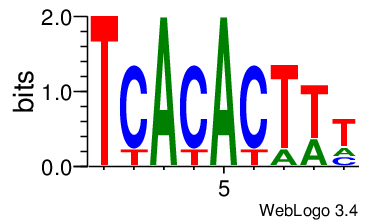

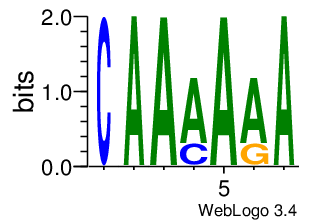

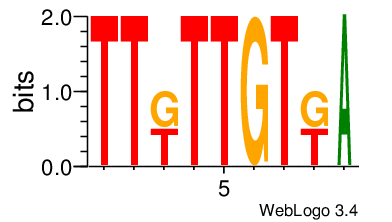

In [15]:
ew.display_logo(do_alignment=False)

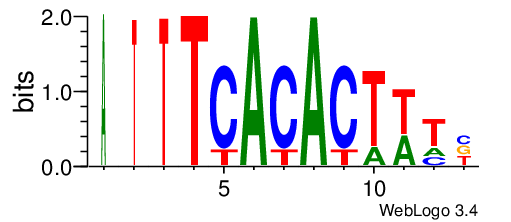

In [16]:
ew.display_logo(motif_num=1)

In [17]:
ew.align_motives()    #MSA with Muscle
motives1=ew.aligned_motives_list
for m in motives1:
    for i in m:
        print i
    print

(2, 'TCACACTTT')
(1, 'TTACACTTT')
(1, 'TCACACTTT')
(1, 'TCACACAAA')
(1, 'TCATACTT-')
(1, 'TCACATTAC')

(1, '-AAAAAA')
(1, '-CAACAG')
(1, '--AAAAA')
(1, 'CAAAAAA')

(1, 'TTTTTGTT-')
(1, 'TTGTTGTGA')



In [18]:
from utilities import MotifWrapper
pwm1 = MotifWrapper(alphabet='dna', pseudocounts=0)

motives=ew.motives_list
pwm1.fit(motives)

In [19]:
ew.display()

        0      1      2      3      4      5      6      7      8      9     10     11     12
-:   0.83   0.83   0.67   0.00   0.00   0.00   0.00   0.00   0.00   0.17   0.17   0.17   0.50
A:   0.17   0.00   0.00   0.00   0.00   1.00   0.00   1.00   0.00   0.17   0.33   0.17   0.00
C:   0.00   0.00   0.00   0.00   0.83   0.00   0.83   0.00   0.83   0.00   0.00   0.17   0.17
G:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.17
T:   0.00   0.17   0.33   1.00   0.17   0.00   0.17   0.00   0.17   0.67   0.50   0.50   0.17

        0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15
-:   0.50   0.50   0.50   0.50   0.50   0.25   0.00   0.00   0.00   0.25   0.50   0.50   0.50   0.50   0.75   0.75
A:   0.00   0.00   0.50   0.00   0.25   0.75   0.75   1.00   0.75   0.75   0.00   0.00   0.25   0.00   0.25   0.00
C:   0.00   0.50   0.00   0.00   0.00   0.00   0.25   0.00   0.00   0.00   0.00   0.00   0

In [20]:
ew.display(motif_num=3)

        0      1      2      3      4      5      6      7      8      9     10
-:   0.50   0.50   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.50
A:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.50
C:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
G:   0.50   0.00   0.00   0.00   0.50   0.00   0.00   1.00   0.00   0.50   0.00
T:   0.00   0.50   1.00   1.00   0.50   1.00   1.00   0.00   1.00   0.50   0.00



In [21]:
# Score a test sequence using probability score
test_seq = 'AAAAAAAAAAAA' * 10
seq_score = ew.score(motif_num=2, seq=test_seq)
print seq_score

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [23]:
%%time
# Score a test sequence using Hidden Markov Model score
mm_score = ew.score_mm(motif_num=1, seq=test_seq)
print 'Motif instances used for scoring:'
for m in ew.original_motives_list[0]:
    print m[1]
print
print 'Score:'
print mm_score

Motif instances used for scoring:
TCACACTTT
TTTACACTTT
TCACACTTTT
TCACACAAAG
ATTTCATAC
TCACATTACC

Score:
[1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304e-220, 1.8241570833838304